###### installer le package Keras Tuner

In [1]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


# 1. Importation des données

### Appel du chemin et des fichiers sans erreurs

In [2]:
# Importation du module os pour interagir avec le système de fichiers
import os

# Importation de matplotlib.pyplot pour la création de graphiques et l'affichage d'images
import matplotlib.pyplot as plt

# Importation de la classe Image du module PIL (Pillow) pour manipuler les images
from PIL import Image


# Vérifier le répertoire de travail actuel
current_directory = os.getcwd()
print(f"Répertoire de travail actuel: {current_directory}")

print("\n")

# lister le contenu du repertoire
contenu = os.listdir('/home/jovyan/MonDossier/traitement_image')
print(" le contenu du repertoire")
print(contenu)

Répertoire de travail actuel: /home/jovyan/MonDossier/traitement_image


 le contenu du repertoire
['chien_corriger', 'L', 'logs', 'z_fianle.ipynb', 'chien', 'my_dir', 'merdas', 'M', 'image_blue.png', 'best_cnn_model.h5', 'chat', 'best_model.h5', 'Untitled.ipynb', 'image_red.png', 'image_green.png', 'ML', 'chat_corriger', 'images_animaux_sauvegardees', 'clients_api.csv', 'base_image.ipynb', 'images', 'code_base.ipynb', 'Structure_propre.ipynb', 'zzz.ipynb', 'bon_code.ipynb', '.ipynb_checkpoints']


### Vérification de base des strcutures des images 

In [3]:
# On utilise Counter pour compter les occurrences
from collections import Counter


def afficher_images(base_directory, sub_directory_images, nb_images):
    full_path = os.path.join(base_directory, sub_directory_images)
    
    # Obtenir la liste des fichiers dans le répertoire images
    files = os.listdir(full_path)

    # Lire les premières images, limitées par nb_images
    for i in range(min(len(files), nb_images)):  # Limiter au nombre d'images spécifié
        file_name = files[i]
        file_path = os.path.join(full_path, file_name)
        
        # Vérifier si c'est un fichier et non un répertoire
        if os.path.isfile(file_path):
            # Tenter d'ouvrir l'image et l'afficher
            img = Image.open(file_path)
            plt.figure()
            plt.title(f'Image {i+1}: {file_name}')
            plt.imshow(img)
            plt.axis('off')  # Ne pas afficher les axes
            plt.show()

def analyser_images(base_directory, sub_directory_images='images'):
    # Construire le chemin complet vers le sous-répertoire des images
    full_path = os.path.join(base_directory, sub_directory_images)

    # Obtenir la liste des fichiers dans le répertoire images
    files = os.listdir(full_path)

    # Initialiser des listes pour stocker les propriétés des images
    sizes = []
    modes = []
    formats = []

    # Lire les propriétés des images
    for file_name in files:
        file_path = os.path.join(full_path, file_name)
        
        # Vérifier si c'est un fichier et non un répertoire
        if os.path.isfile(file_path):
            # Tenter d'ouvrir l'image et obtenir ses propriétés
            img = Image.open(file_path)
            image_size = img.size  # (largeur, hauteur)
            image_mode = img.mode
            image_format = img.format
            
            # Ajouter les propriétés aux listes
            sizes.append(image_size)
            modes.append(image_mode)
            formats.append(image_format)
    
    # Compter les occurrences de chaque élément
    size_counts = Counter(sizes)
    mode_counts = Counter(modes)
    format_counts = Counter(formats)

    # Vérifier et afficher les tailles des images
    print("\nAnalyse des tailles des images :")
    if len(size_counts) == 1:
        print("Toutes les images ont la même taille.\n")
    else:
        print("Les tailles des images sont différentes :")
        for size, count in size_counts.most_common(20):  # Limiter à 20 éléments
            print(f"Taille {size}: {count} occurrence(s)")
        print()  # Sauter une ligne après la liste des tailles

    # Vérifier et afficher les modes de couleur des images
    print("Analyse des modes de couleur des images :")
    if len(mode_counts) == 1:
        print("Toutes les images ont le même mode de couleur.\n")
    else:
        print("Les modes de couleur des images sont différents :")
        for mode, count in mode_counts.items():
            print(f"Mode {mode}: {count} occurrence(s)")
        print()  # Sauter une ligne après la liste des modes

    # Vérifier et afficher les formats des images
    print("Analyse des formats des images :")
    if len(format_counts) == 1:
        print("Toutes les images ont le même format de fichier.\n")
    else:
        print("Les formats des images sont différents :")
        for format_, count in format_counts.items():
            print(f"Format {format_}: {count} occurrence(s)")
        print()  # Sauter une ligne après la liste des formats

    # Vérifier si aucune image n'a été trouvée ou traitée
    if not sizes:
        print("Aucune image valide n'a été trouvée ou traitée.")


#####  Appel de la fonction pour chat 

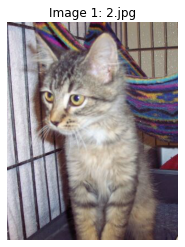

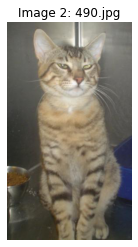

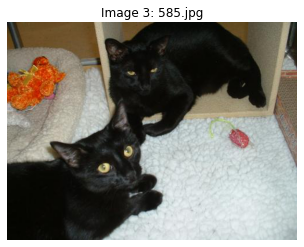


Analyse des tailles des images :
Les tailles des images sont différentes :
Taille (500, 375): 248 occurrence(s)
Taille (320, 240): 17 occurrence(s)
Taille (500, 333): 17 occurrence(s)
Taille (375, 500): 16 occurrence(s)
Taille (500, 332): 8 occurrence(s)
Taille (400, 300): 6 occurrence(s)
Taille (350, 262): 6 occurrence(s)
Taille (448, 336): 5 occurrence(s)
Taille (200, 150): 5 occurrence(s)
Taille (500, 371): 5 occurrence(s)
Taille (300, 225): 5 occurrence(s)
Taille (500, 357): 5 occurrence(s)
Taille (340, 260): 4 occurrence(s)
Taille (333, 500): 4 occurrence(s)
Taille (500, 400): 4 occurrence(s)
Taille (500, 382): 4 occurrence(s)
Taille (500, 430): 4 occurrence(s)
Taille (480, 360): 4 occurrence(s)
Taille (500, 417): 4 occurrence(s)
Taille (500, 346): 4 occurrence(s)

Analyse des modes de couleur des images :
Les modes de couleur des images sont différents :
Mode RGB: 1024 occurrence(s)
Mode P: 4 occurrence(s)

Analyse des formats des images :
Les formats des images sont différents 

In [4]:
base_directory = '/home/jovyan/MonDossier/traitement_image'
sub_directory_images = 'chat'
nb_images = 3

afficher_images(base_directory, sub_directory_images, nb_images)
analyser_images(base_directory, sub_directory_images)


#####  Appel de la fonction pour chien

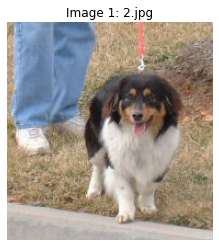

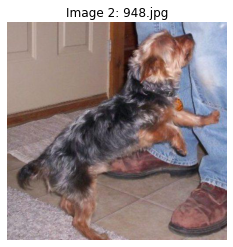

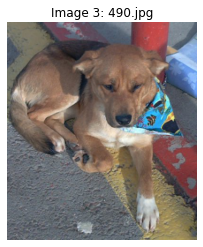


Analyse des tailles des images :
Les tailles des images sont différentes :
Taille (500, 375): 205 occurrence(s)
Taille (375, 500): 23 occurrence(s)
Taille (320, 240): 20 occurrence(s)
Taille (500, 333): 16 occurrence(s)
Taille (500, 332): 14 occurrence(s)
Taille (400, 300): 12 occurrence(s)
Taille (350, 262): 10 occurrence(s)
Taille (500, 500): 9 occurrence(s)
Taille (500, 377): 7 occurrence(s)
Taille (333, 500): 7 occurrence(s)
Taille (480, 360): 7 occurrence(s)
Taille (500, 334): 6 occurrence(s)
Taille (500, 392): 5 occurrence(s)
Taille (300, 225): 5 occurrence(s)
Taille (448, 336): 5 occurrence(s)
Taille (500, 335): 4 occurrence(s)
Taille (500, 374): 4 occurrence(s)
Taille (500, 403): 4 occurrence(s)
Taille (500, 385): 4 occurrence(s)
Taille (500, 380): 4 occurrence(s)

Analyse des modes de couleur des images :
Toutes les images ont le même mode de couleur.

Analyse des formats des images :
Les formats des images sont différents :
Format JPEG: 1017 occurrence(s)
Format BMP: 11 occu

In [5]:
base_directory = '/home/jovyan/MonDossier/traitement_image'
sub_directory_images = 'chien'
nb_images = 3

afficher_images(base_directory, sub_directory_images, nb_images)
analyser_images(base_directory, sub_directory_images)

# 2. Prétraitement 

### Base

In [6]:
import numpy as np
import cv2
from PIL import Image, ImageEnhance

# Fonction pour convertir l'image en RGB
def convertir_en_rgb(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    return image

# Redimensionnement de l'image en utilisant l'algorithme de rééchantillonnage LANCZOS pour une meilleure qualité
def redimensionner_image(image, taille=(224, 224)):
    return image.resize(taille, Image.Resampling.LANCZOS)


# La fonction detection_filtre_flou prend une image sous forme de tableau ensuite :
# 1. Détection des images floues via la variance du Laplacien.
# 2. Amélioration des images légèrement floues avec un filtre de netteté.
# 3. Suppression des images qui restent floues après l'amélioration.

def detection_filtre_flou(image_array, image_path_sortie, threshold=100):
    # Convertit l'image en niveaux de gris si elle est en couleur
    if len(image_array.shape) == 3 and image_array.shape[2] == 3:
        gray_image = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
    else:
        gray_image = image_array

    # Calcule la variance du Laplacian pour mesurer le degré de flou
    variance_laplacian = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    
    # Si la variance est inférieure au seuil, l'image est considérée comme floue
    if variance_laplacian < threshold:
        # Application d'un filtre de netteté (kernel de netteté)
        kernel = np.array([[0, -1, 0],
                           [-1,  5, -1],
                           [0, -1, 0]])
        sharpened_image = cv2.filter2D(image_array, -1, kernel)
        
        # Vérifie à nouveau si l'image filtrée est encore floue
        gray_sharpened = cv2.cvtColor(sharpened_image, cv2.COLOR_RGB2GRAY) if len(sharpened_image.shape) == 3 else sharpened_image
        variance_sharpened = cv2.Laplacian(gray_sharpened, cv2.CV_64F).var()
        
        # Si l'image reste floue après filtrage, elle est potentiellement supprimée
        if variance_sharpened < threshold:
            if os.path.exists(image_path_sortie):
                os.remove(image_path_sortie)  # Supprime l'image existante si elle est floue
            return None  # L'image est rejetée car toujours floue
        
        return sharpened_image  # Retourne l'image avec le filtre de netteté appliqué
    
    return image_array  # Retourne l'image originale si elle n'est pas floue


# Fonction pour ajuster la luminosité et le contraste d'une image 
# 1. Calculer la luminosité moyenne de l'image en niveaux de gris.
# 2. Augmenter la luminosité et le contraste si la luminosité est inférieure à un seuil.
# 3. Appliquer des facteurs d'amélioration pour ajuster la luminosité et le contraste.

def ajuster_luminosite_et_contraste(image, facteur_luminosite=1.5, facteur_contraste=1.5, seuil_luminosite=100):
    # Convertit l'image en niveaux de gris pour calculer la luminosité moyenne
    image_grise = image.convert('L')
    
    # Calcule l'histogramme de l'image en niveaux de gris
    histogramme = image_grise.histogram()
    
    # Calcule la luminosité moyenne de l'image
    luminosite_moyenne = sum(i * histogramme[i] for i in range(256)) / sum(histogramme)
    
    # Si la luminosité moyenne est inférieure au seuil spécifié, on ajuste luminosité et contraste
    if luminosite_moyenne < seuil_luminosite:
        # Amélioration de la luminosité de l'image
        ameliorateur_luminosite = ImageEnhance.Brightness(image)
        image = ameliorateur_luminosite.enhance(facteur_luminosite)
        
        # Amélioration du contraste de l'image
        ameliorateur_contraste = ImageEnhance.Contrast(image)
        image = ameliorateur_contraste.enhance(facteur_contraste)
    
    return image


# Conversion de l'image en un tableau NumPy
def convertir_en_numpy(image):
    return np.array(image)

# Normalisation de l'image
def normaliser_image(image_numpy):
    return image_numpy / 255.0


# Pipeline complet pour traiter une image : la fonction traiter_image fait appel à d'autres fonctions précédemment définies
def traiter_image(image_path_entree, image_path_sortie, taille=(224, 224), threshold=100):
    # Ouvre l'image depuis le chemin d'entrée
    image = Image.open(image_path_entree)
    
    # Appelle des fonctions précédentes
    image = convertir_en_rgb(image)
    image = redimensionner_image(image, taille)
    image = ajuster_luminosite_et_contraste(image)
    image_array = convertir_en_numpy(image)
    image_filtrée = detection_filtre_flou(image_array, image_path_sortie, threshold)
    
    if image_filtrée is None:  # L'image a été supprimée
        return None
    
    image_array = normaliser_image(image_filtrée)
    return image_array



# Fonction qui encapsule les images traitées dans un repertoire via au pipline précedent donc :
      # 1. Créer le répertoire de sortie s'il n'existe pas.
      # 2. Traiter les images du répertoire d'entrée.
      # 3. Gérer les images traitées, supprimées et non traitées.
      # 4. Afficher un résumé des résultats.
        
def traiter_images_dossier(dossier_entree, dossier_sortie, pipeline_func):
    # Créer le dossier de sortie s'il n'existe pas
    if not os.path.exists(dossier_sortie):
        os.makedirs(dossier_sortie)
        
    # Initialisation des listes
    liste_traitees = []
    liste_supprimees = []
    liste_non_traitees = []

    # Vérification des fichiers dans le dossier d'entrée
    fichiers_entree = os.listdir(dossier_entree)
    
    # Traiter les images du dossier d'entrée
    for image_filename in fichiers_entree:
        image_path_entree = os.path.join(dossier_entree, image_filename)
        image_path_sortie = os.path.join(dossier_sortie, image_filename)
        
        # Vérification du format de fichier
        if os.path.isfile(image_path_entree) and image_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            
            # Appliquer le pipeline de traitement à l'image
            image_propre = pipeline_func(image_path_entree, image_path_sortie)
            
            if image_propre is not None:
                # Sauvegarder l'image traitée
                Image.fromarray((image_propre * 255).astype(np.uint8)).save(image_path_sortie)
                liste_traitees.append(image_filename)
            else:
                # Ajouter à la liste des images supprimées
                liste_supprimees.append(image_filename)
        else:
            # Ajouter à la liste des images non traitées (mauvais format)
            liste_non_traitees.append(image_filename)

    # Affichage des résultats
    print(f"Images originales : {len(liste_traitees) + len(liste_supprimees) + len(liste_non_traitees)}")
    print(f"Images traitées : {len(liste_traitees)}")
    print(f"Images supprimées : {len(liste_supprimees)}")
    print(f"Images non traitées (pas au bon format) : {len(liste_non_traitees)}")


##### Appel pour le dossier chat

In [7]:
# Exemple d'utilisation avec ta fonction pipeline
dossier_entree = '/home/jovyan/MonDossier/traitement_image/chat'
dossier_sortie = '/home/jovyan/MonDossier/traitement_image/chat_corriger'
traiter_images_dossier(dossier_entree, dossier_sortie, traiter_image)

Images originales : 1029
Images traitées : 1027
Images supprimées : 1
Images non traitées (pas au bon format) : 1


##### Appel pour le dossier chien

In [8]:
# Exemple d'utilisation avec ta fonction pipeline
dossier_entree = '/home/jovyan/MonDossier/traitement_image/chien'
dossier_sortie = '/home/jovyan/MonDossier/traitement_image/chien_corriger'
traiter_images_dossier(dossier_entree, dossier_sortie, traiter_image)

Images originales : 1029
Images traitées : 1027
Images supprimées : 1
Images non traitées (pas au bon format) : 1


##### vérification

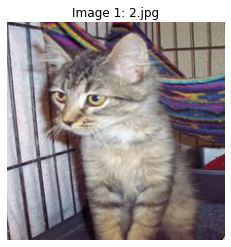


Analyse des tailles des images :
Toutes les images ont la même taille.

Analyse des modes de couleur des images :
Toutes les images ont le même mode de couleur.

Analyse des formats des images :
Toutes les images ont le même format de fichier.



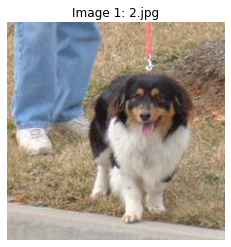


Analyse des tailles des images :
Toutes les images ont la même taille.

Analyse des modes de couleur des images :
Toutes les images ont le même mode de couleur.

Analyse des formats des images :
Toutes les images ont le même format de fichier.



In [9]:
## Appel de la fonction 
base_directory = '/home/jovyan/MonDossier/traitement_image'
sub_directory_images_chat = 'chat_corriger'
sub_directory_images_chien = 'chien_corriger'
nb_images = 1

afficher_images(base_directory, sub_directory_images_chat, nb_images)
analyser_images(base_directory, sub_directory_images_chat)


afficher_images(base_directory, sub_directory_images_chien, nb_images)
analyser_images(base_directory, sub_directory_images_chien)

### Créer une matrice avec les label

In [10]:
import numpy as np
import os
from PIL import Image

def creer_matrice_donnees(dossier_images, label, taille=(224, 224), threshold=100):
    """
    Crée une matrice NumPy des images traitées et un tableau des labels associés.
    """
    liste_images = []
    liste_labels = []

    for image_filename in os.listdir(dossier_images):
        image_path_entree = os.path.join(dossier_images, image_filename)
        image_path_sortie = os.path.join(dossier_images, "processed_" + image_filename)  # Nom du fichier traité

        if os.path.isfile(image_path_entree) and image_filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_propre = traiter_image(image_path_entree, image_path_sortie, taille, threshold)
            
            if image_propre is not None:
                # Vérifie que toutes les images ont la même taille
                if image_propre.shape == (taille[0], taille[1], 3):  # Assume RGB images
                    # Ajouter l'image traitée à la liste
                    liste_images.append(image_propre)
                    
                    # Ajouter le label à la liste
                    liste_labels.append(label)
                else:
                    print(f"Image {image_filename} a une taille inattendue: {image_propre.shape}")

    # Convertir les listes en matrices NumPy
    matrice_images = np.array(liste_images)
    tableau_labels = np.array(liste_labels)
    
    return matrice_images, tableau_labels



#### Appel

In [11]:
# Exemple d'utilisation pour les images de chat
dossier_images_chat = '/home/jovyan/MonDossier/traitement_image/chat_corriger'
label_chat =  0  # 0 pour chat
matrice_images_chat, tableau_labels_chat = creer_matrice_donnees(dossier_images_chat, label_chat)

print(f"Forme de la matrice des images de chat : {matrice_images_chat.shape}")
print(f"Forme du tableau des labels de chat : {tableau_labels_chat.shape}")
print("\t")

# Exemple d'utilisation pour les images de chien
dossier_images_chien = '/home/jovyan/MonDossier/traitement_image/chien_corriger'
label_chien =  1  # 1 pour chien
matrice_images_chien, tableau_labels_chien = creer_matrice_donnees(dossier_images_chien, label_chien)

print(f"Forme de la matrice des images de chien : {matrice_images_chien.shape}")
print(f"Forme du tableau des labels de chien : {tableau_labels_chien.shape}")
print("\t")

# Combiner les matrices et les labels
matrice_images_animaux = np.concatenate((matrice_images_chien, matrice_images_chat), axis=0)
tableau_labels_animaux = np.concatenate((tableau_labels_chien, tableau_labels_chat), axis=0)

print(f"Forme de la matrice des images combinées : {matrice_images_animaux.shape}")
print(f"Forme du tableau des labels combinés : {tableau_labels_animaux.shape}")


Forme de la matrice des images de chat : (1027, 224, 224, 3)
Forme du tableau des labels de chat : (1027,)
	
Forme de la matrice des images de chien : (1027, 224, 224, 3)
Forme du tableau des labels de chien : (1027,)
	
Forme de la matrice des images combinées : (2054, 224, 224, 3)
Forme du tableau des labels combinés : (2054,)


#### Vérification des labels des images et de la normalisation

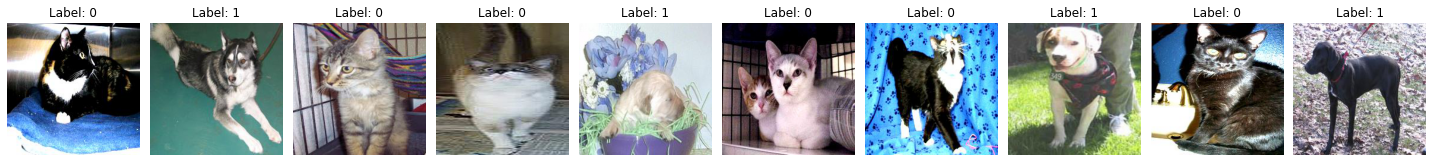

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Nombre d'images à afficher
nombre_images = 10

# Sélectionner aléatoirement 10 indices
indices = np.random.choice(len(matrice_images_animaux), nombre_images, replace=False)

# Créer une figure avec une grille d'images
fig, axes = plt.subplots(1, nombre_images, figsize=(20, 5))

# Afficher les images et les labels
for i, index in enumerate(indices):
    ax = axes[i]
    ax.imshow(matrice_images_animaux[index])
    ax.set_title(f"Label: {tableau_labels_animaux[index]}")
    ax.axis('off')  # Ne pas afficher les axes

plt.tight_layout()
plt.show()



In [13]:
# Vérifier les statistiques de la matrice des images normalisées
# Valeur minimale proche de 0.
# Valeur maximale proche de 1.
# Valeur moyenne dépendante de l’échantillonnage mais généralement proche de 0.5.

def verifier_normalisation(matrice_images):
    min_val = np.min(matrice_images)
    max_val = np.max(matrice_images)
    mean_val = np.mean(matrice_images)
    
    print(f"Valeur minimale : {min_val}")
    print(f"Valeur maximale : {max_val}")
    print(f"Valeur moyenne : {mean_val}")

verifier_normalisation(matrice_images_animaux)

Valeur minimale : 0.0
Valeur maximale : 1.0
Valeur moyenne : 0.48605167390765935


# 3. Méthode de classification supervisé

### Préalable

Formes des tableaux:
X_train : (1314, 224, 224, 3)
y_train : (1314,)
X_val : (329, 224, 224, 3)
y_val : (329,)
X_test : (411, 224, 224, 3)
y_test : (411,)

Types de données:
Type de X_train : float64
Type de y_train : int64

Vérification des valeurs d'X_train :
Valeurs des images - Min: 0.0, Max: 1.0, Mean: 0.488055655021395
Vérification des valeurs d'X_val :
Valeurs des images - Min: 0.0, Max: 1.0, Mean: 0.48187523093710655

10 premiers exemples y_train : [1 0 0 1 1 0 0 0 1 0]


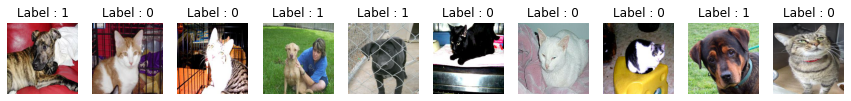

Distribution des classes dans y_train :
Label 0: 651 exemples
Label 1: 663 exemples


In [14]:
# Les jeux de données :
# - X_train, y_train : pour l'entraînement
# - X_val, y_val : pour la validation
# - X_test, y_test : pour le test final

from sklearn.model_selection import train_test_split

# Séparation des données en 80% entraînement+validation et 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(matrice_images_animaux, tableau_labels_animaux, 
                                                            test_size=0.2, random_state=42)

# Séparation des données d'entraînement en 80% entraînement et 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


import numpy as np
import matplotlib.pyplot as plt

# Vérifier les formes des tableaux
print("Formes des tableaux:")
print(f"X_train : {X_train.shape}")
print(f"y_train : {y_train.shape}")
print(f"X_val : {X_val.shape}")
print(f"y_val : {y_val.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")
print()

# Vérifier les types de données
print("Types de données:")
print(f"Type de X_train : {X_train.dtype}")
print(f"Type de y_train : {y_train.dtype}")
print()

# Vérifier les valeurs des images
def verifier_valeurs_images(X):
    min_val = np.min(X)
    max_val = np.max(X)
    mean_val = np.mean(X)
    print(f"Valeurs des images - Min: {min_val}, Max: {max_val}, Mean: {mean_val}")

print("Vérification des valeurs d'X_train :")
verifier_valeurs_images(X_train)

print("Vérification des valeurs d'X_val :")
verifier_valeurs_images(X_val)

print()  # Montre les 10 premiers exemples
print("10 premiers exemples y_train :", y_train[:10])  # Montre les 10 premiers exemples


# Visualiser quelques exemples d'images
def afficher_exemples(X, y, n=10):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(X[i])
        plt.title(f"Label : {y[i]}")
        plt.axis('off')
    plt.show()

# Afficher quelques exemples d'images d'X_train
afficher_exemples(X_train, y_train)

# Vérifier l'équilibre des classes
unique, counts = np.unique(y_train, return_counts=True)
distribution = dict(zip(unique, counts))

print("Distribution des classes dans y_train :")
for label, count in distribution.items():
    print(f"Label {label}: {count} exemples")


##### Configuration de la graine pour la reproductibilité

In [15]:
import os
import numpy as np
import random
import tensorflow as tf

# Configuration de la graine pour la reproductibilité
def set_seed(seed_value=42):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)


2024-10-06 02:32:45.046749: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### Fonction permettant de trouver rapidement les hyperparamètres avec RandomSearch de Keras Tuner.
https://keras.io/api/keras_tuner/

In [16]:
from kerastuner.tuners import RandomSearch
 

def tune_hyperparameters(build_model, X_train, y_train, X_val, y_val, max_trials, executions_per_trial,directory, epochs):
    
    # Initialisation du tuner
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        overwrite=True,
        max_trials=max_trials,
        executions_per_trial=executions_per_trial,
        directory=directory,
        project_name='mlp_classification_tuning'
    )

    # Lancer la recherche d'hyperparamètres
    tuner.search(X_train, y_train, epochs, validation_data=(X_val, y_val))
    
    # Récupérer le meilleur modèle
    best_model = tuner.get_best_models(num_models=1)[0]

    # Vous pouvez également afficher les meilleurs hyperparamètres
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Meilleurs hyperparamètres : ", best_hyperparameters.values)
    print()  # Ceci ajoute un saut de ligne
    print(best_model.summary() )

    return tuner, best_model, best_hyperparameters


/tmp/ipykernel_408/3969600777.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### Pipeline d'Entraînement de Modèles de Deep Learning avec Gestion du Surapprentissage

Ce pipeline comprend plusieurs fonctions clés pour l'entraînement de modèles de deep learning, chacune ayant un rôle spécifique :

1. **train_and_plot** : Cette fonction entraîne un modèle et affiche les courbes de précision et de perte pour les données d'entraînement et de validation. Elle utilise **EarlyStopping** pour éviter le surapprentissage en arrêtant l'entraînement lorsque la performance ne s'améliore plus.

2. **train_and_plot_model** : Semblable à la première, cette fonction améliore la gestion des taux d'apprentissage en intégrant **ReduceLROnPlateau** pour ajuster automatiquement le taux d'apprentissage lorsque la perte de validation stagne.

3. **train_and_plot_model_augmentation** : Enrichit le modèle avec des techniques d'augmentation des données pour améliorer la robustesse et la généralisation. Elle utilise également les callbacks mentionnés pour contrôler le surapprentissage.

Ce pipeline est conçu pour être flexible et adaptable à divers modèles et ensembles de données tout en assurant une bonne gestion du surapprentissage.

Voir plus detaille sur les paramatres :
- https://keras.io/api/callbacks/reduce_lr_on_plateau/
- https://keras.io/api/callbacks/early_stopping/


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Fonction pour tracer la précision et la perte du modèle
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Précision Entraînement')
    plt.plot(history.history['val_accuracy'], label='Précision Validation')
    plt.title('Précision du modèle')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()

    # Perte
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Perte Entraînement')
    plt.plot(history.history['val_loss'], label='Perte Validation')
    plt.title('Perte du modèle')
    plt.xlabel('Époques')
    plt.ylabel('Perte')
    plt.legend()

    plt.tight_layout()
    plt.show()

##############
## 1. Fonction
##############
def create_callbacks(lr_factor=0.5, min_lr=1e-5, lr_patience=3, early_stop_patience=3):
    """Fonction pour créer les callbacks"""
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=lr_factor, patience=lr_patience, min_lr=min_lr, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=early_stop_patience, restore_best_weights=True, verbose=1)
    return [reduce_lr, early_stopping]

def train_and_plot_basic(model, X_train, y_train, X_val, y_val, patience, epochs, batch_size):
    """Entraîne le modèle et affiche les résultats, utilisant uniquement EarlyStopping"""
    # Création des callbacks uniquement pour l'arrêt anticipé
    callbacks = create_callbacks(early_stop_patience=patience)
    
    # Entraînement du modèle
    history = model.fit(X_train, y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_data=(X_val, y_val), 
                        callbacks=[callbacks[1]])  # Utilise uniquement EarlyStopping
    
    # Tracé de l'historique d'entraînement
    plot_training_history(history)

#############
## 2. fonction
#############
def train_and_plot_lr(model, X_train, y_train, X_val, y_val, 
                      batch_size=64, epochs=20, 
                      lr_factor=0.5, min_lr=1e-5, 
                      lr_patience=3, early_stop_patience=3):
    """Entraîne le modèle avec ajustement du taux d'apprentissage et affiche les résultats"""
    # Création des callbacks avec ReduceLROnPlateau et EarlyStopping
    callbacks = create_callbacks(lr_factor=lr_factor, min_lr=min_lr, lr_patience=lr_patience, early_stop_patience=early_stop_patience)
    
    history = model.fit(X_train, y_train, 
                        validation_data=(X_val, y_val), 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        callbacks=callbacks)  # Utilise les deux callbacks

    plot_training_history(history)

##############    
## 3. fonction
##############
def train_and_plot_augmentation(model, X_train, y_train, X_val, y_val, 
                                 batch_size, epochs, 
                                 lr_factor, min_lr, 
                                 lr_patience, early_stop_patience):
    """Entraîne le modèle avec augmentation de données et affiche les résultats"""
    # Création de l'instance de Data Augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    datagen.fit(X_train)  # Adapter le générateur aux images d'entraînement

    callbacks = create_callbacks(lr_factor=lr_factor, min_lr=min_lr, lr_patience=lr_patience, early_stop_patience=early_stop_patience)

    history = model.fit(
        datagen.flow(X_train, y_train, batch_size=batch_size),
        validation_data=(X_val, y_val),
        epochs=epochs,
        callbacks=callbacks
    )

    plot_training_history(history)

    return history


# 3.1 MLP

In [18]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop  # Importation correcte des optimizers
from tensorflow.keras.layers import LeakyReLU, PReLU, Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import HeNormal  # Importation de l'initialisateur He

# Fonction utilitaire pour ajouter des couches Dense avec activations avancées
def add_dense_layers(hp, x, num_layers):
    for i in range(1, num_layers + 1):
        # Créer une couche Dense avec des hyperparamètres tunables
        x = Dense(
            units=hp.Int(f'units_{i}', min_value=8, max_value=512, step=32),
            kernel_initializer=HeNormal(),  # Initialisation de He
            name=f'dense_{i}'  # Nommage unique pour chaque couche dense
        )(x)
        
        # Sélection de l'activation (ReLU, LeakyReLU, PReLU)
        activation_choice = hp.Choice(f'activation_{i}', ['relu', 'leaky_relu', 'prelu'])
        
        if activation_choice == 'relu':
            x = layers.Activation('relu')(x)
        elif activation_choice == 'leaky_relu':
            x = LeakyReLU(alpha=hp.Float(f'leaky_relu_alpha_{i}', min_value=0.01, max_value=0.3, step=0.05))(x)
        elif activation_choice == 'prelu':
            x = PReLU()(x)
        
        # Dropout pour la régularisation
        x = Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1), name=f'dropout_{i}')(x)
    
    return x

# Fonction pour construire le modèle MLP
def build_model(hp):
    inputs = layers.Input(shape=(224, 224, 3))  # Images en entrée

    # Choix entre GlobalAveragePooling ou GlobalMaxPooling
    pooling_choice = hp.Choice("pooling_type", ["global_average", "global_max"])
    if pooling_choice == "global_average":
        x = GlobalAveragePooling2D()(inputs)
    else:
        x = GlobalMaxPooling2D()(inputs)
        
    # Permet d'ajouter 1 à 3 couches denses
    num_layers = hp.Int('num_layers', 1, 3)  # Nombre de couches denses
    x = add_dense_layers(hp, x, num_layers)

    # Couche de sortie pour la classification binaire
    outputs = Dense(1, activation='sigmoid', name='output')(x)

    # Créer le modèle
    model = Model(inputs=inputs, outputs=outputs, name='MLP_Model')

    # Optimizer tunable
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    
    if optimizer_choice == 'adam':
        optimizer = Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    
    # Compilation du modèle
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


##### Appel des fonctions 

In [19]:
# Appel de la fonction tune_hyperparameters
set_seed(42)

tuner, best_model_mlp, best_hyperparameters = tune_hyperparameters(
                                        build_model,  # La fonction pour construire le modèle
                                        X_train,      # Les données d'entraînement
                                        y_train,      # Les labels d'entraînement
                                        X_val,        # Les données de validation
                                        y_val,        # Les labels de validation
                                        max_trials=5, # Nombre maximal d'essais pour la recherche
                                        executions_per_trial=3,  # Combien de fois chaque configuration est testée
                                        directory = "ML",
                                        epochs=3 )


Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.49949340025583905

Best val_accuracy So Far: 0.5349543889363607
Total elapsed time: 00h 01m 07s
Meilleurs hyperparamètres :  {'pooling_type': 'global_average', 'num_layers': 3, 'units_1': 200, 'activation_1': 'prelu', 'dropout_1': 0.2, 'optimizer': 'rmsprop', 'learning_rate': 0.00021921043460736966, 'leaky_relu_alpha_1': 0.01, 'units_2': 392, 'activation_2': 'leaky_relu', 'dropout_2': 0.2, 'units_3': 200, 'activation_3': 'leaky_relu', 'dropout_3': 0.2, 'leaky_relu_alpha_2': 0.01, 'leaky_relu_alpha_3': 0.01}

Model: "MLP_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 global_average_pooling2d (G  (None, 3)                0         
 lobalAveragePooling2D)                                          
                        

Epoch 1/10
42/42 [==============================] - 2s 27ms/step - loss: 0.7251 - accuracy: 0.4932 - val_loss: 0.6892 - val_accuracy: 0.5228
Epoch 2/10
42/42 [==============================] - 0s 7ms/step - loss: 0.7100 - accuracy: 0.5183 - val_loss: 0.6852 - val_accuracy: 0.6170
Epoch 3/10
42/42 [==============================] - 0s 7ms/step - loss: 0.7142 - accuracy: 0.5046 - val_loss: 0.6848 - val_accuracy: 0.6140
Epoch 4/10
42/42 [==============================] - 0s 7ms/step - loss: 0.7111 - accuracy: 0.5205 - val_loss: 0.6869 - val_accuracy: 0.5380
Epoch 5/10
42/42 [==============================] - 0s 7ms/step - loss: 0.7112 - accuracy: 0.5236 - val_loss: 0.7025 - val_accuracy: 0.5015
Epoch 6/10
42/42 [==============================] - 0s 6ms/step - loss: 0.7097 - accuracy: 0.5236 - val_loss: 0.6907 - val_accuracy: 0.5228
Epoch 7/10
42/42 [==============================] - 0s 7ms/step - loss: 0.7056 - accuracy: 0.4893 - val_loss: 0.6878 - val_accuracy: 0.5046
Epoch 8/10
42/42 [=

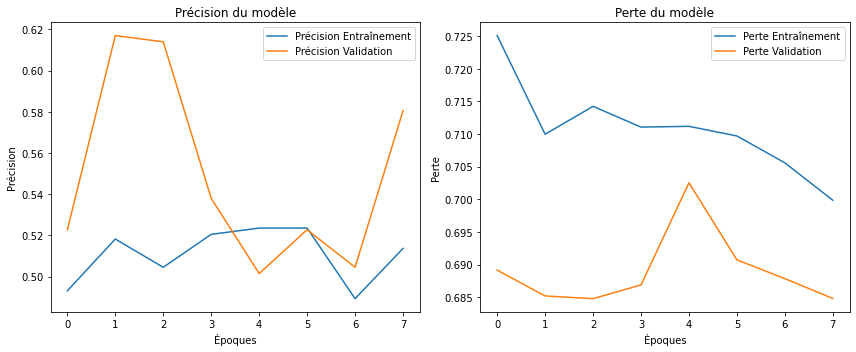

In [20]:
# Appel de la fonction tune_hyperparameters
set_seed(42)

# Entraîne le meilleur modèle 
train_and_plot_basic(best_model_mlp, X_train, y_train, X_val, y_val, patience=5, epochs=10, batch_size=32) 

# 3.2 CNN

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

set_seed(42)

# Définir l'entrée du modèle avec la forme de l'image originale (par exemple, 224x224x3)
inputs = Input(shape=(224, 224, 3))  # Change la taille si tes images ont une autre forme

################
# Couche conv 2D
#################
# 1ère couche de convolution avec 32 filtres de taille 3x3, suivi d'une activation ReLU
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)

# Ajout de MaxPooling pour réduire la taille spatiale de l'image
x = MaxPooling2D(pool_size=(2, 2))(x)

# 2ème couche de convolution avec 64 filtres de taille 3x3, suivi d'une activation ReLU
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 3ème couche de convolution avec 128 filtres de taille 3x3, suivi d'une activation ReLU
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Aplatir la sortie des couches de convolution pour passer à la partie Fully Connected
x = Flatten()(x)

# Ajout de la première couche cachée avec 128 neurones et activation ReLU
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Ajout de la deuxième couche cachée avec 64 neurones et activation ReLU
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Couche de sortie avec 1 neurone (pour la classification binaire : chien vs chat) avec activation sigmoïde
outputs = Dense(1, activation='sigmoid')(x)

# Création du modèle en spécifiant les entrées et les sorties
model_cnn = Model(inputs=inputs, outputs=outputs, name='CNN_Model')

# Limite le gradient à une norme maximale de 1.0
optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model_cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model_cnn.summary()



Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73

Epoch 1/10
42/42 [==============================] - 29s 665ms/step - loss: 0.7002 - accuracy: 0.5053 - val_loss: 0.6907 - val_accuracy: 0.5198
Epoch 2/10
42/42 [==============================] - 27s 650ms/step - loss: 0.6887 - accuracy: 0.5183 - val_loss: 0.6876 - val_accuracy: 0.5836
Epoch 3/10
42/42 [==============================] - 27s 647ms/step - loss: 0.6840 - accuracy: 0.5335 - val_loss: 0.6769 - val_accuracy: 0.6201
Epoch 4/10
42/42 [==============================] - 27s 650ms/step - loss: 0.6725 - accuracy: 0.5685 - val_loss: 0.6630 - val_accuracy: 0.6383
Epoch 5/10
42/42 [==============================] - 27s 649ms/step - loss: 0.6624 - accuracy: 0.5974 - val_loss: 0.6441 - val_accuracy: 0.6201
Epoch 6/10
42/42 [==============================] - 28s 660ms/step - loss: 0.6445 - accuracy: 0.6088 - val_loss: 0.6309 - val_accuracy: 0.6717
Epoch 7/10
42/42 [==============================] - 28s 660ms/step - loss: 0.6404 - accuracy: 0.6202 - val_loss: 0.6159 - val_accuracy: 0.6778

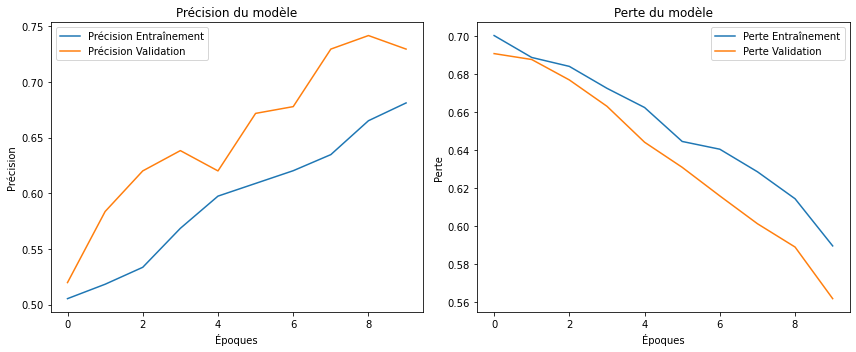

In [28]:
set_seed(42)
train_and_plot_basic(model_cnn, X_train, y_train, X_val, y_val, patience=4, epochs=10, batch_size=32)

##### Augmentation des époques pour voir si continue a converger

Epoch 1/15
42/42 [==============================] - 29s 660ms/step - loss: 0.7002 - accuracy: 0.5053 - val_loss: 0.6907 - val_accuracy: 0.5198
Epoch 2/15
42/42 [==============================] - 27s 642ms/step - loss: 0.6887 - accuracy: 0.5183 - val_loss: 0.6876 - val_accuracy: 0.5836
Epoch 3/15
42/42 [==============================] - 27s 647ms/step - loss: 0.6840 - accuracy: 0.5335 - val_loss: 0.6769 - val_accuracy: 0.6201
Epoch 4/15
42/42 [==============================] - 27s 651ms/step - loss: 0.6725 - accuracy: 0.5685 - val_loss: 0.6630 - val_accuracy: 0.6383
Epoch 5/15
42/42 [==============================] - 28s 660ms/step - loss: 0.6624 - accuracy: 0.5974 - val_loss: 0.6441 - val_accuracy: 0.6201
Epoch 6/15
42/42 [==============================] - 27s 646ms/step - loss: 0.6445 - accuracy: 0.6088 - val_loss: 0.6309 - val_accuracy: 0.6717
Epoch 7/15
42/42 [==============================] - 27s 648ms/step - loss: 0.6404 - accuracy: 0.6202 - val_loss: 0.6159 - val_accuracy: 0.6778

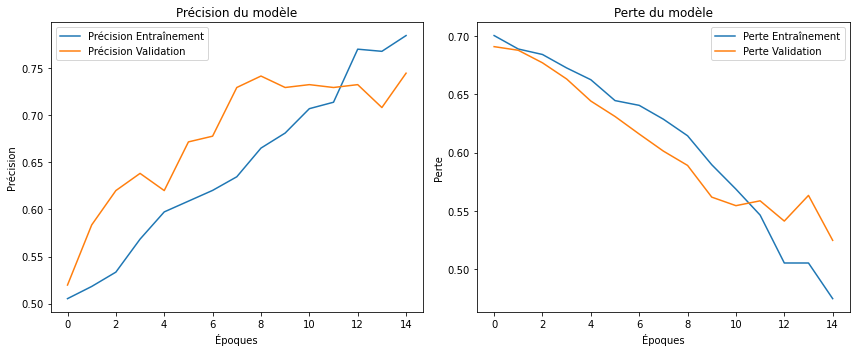

In [31]:

# Définir l'entrée du modèle avec la forme de l'image originale (par exemple, 224x224x3)
inputs = Input(shape=(224, 224, 3))  # Change la taille si tes images ont une autre forme

################
# Couche conv 2D
#################
# 1ère couche de convolution avec 32 filtres de taille 3x3, suivi d'une activation ReLU
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)

# Ajout de MaxPooling pour réduire la taille spatiale de l'image
x = MaxPooling2D(pool_size=(2, 2))(x)

# 2ème couche de convolution avec 64 filtres de taille 3x3, suivi d'une activation ReLU
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 3ème couche de convolution avec 128 filtres de taille 3x3, suivi d'une activation ReLU
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Aplatir la sortie des couches de convolution pour passer à la partie Fully Connected
x = Flatten()(x)

# Ajout de la première couche cachée avec 128 neurones et activation ReLU
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# Ajout de la deuxième couche cachée avec 64 neurones et activation ReLU
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Couche de sortie avec 1 neurone (pour la classification binaire : chien vs chat) avec activation sigmoïde
outputs = Dense(1, activation='sigmoid')(x)

# Création du modèle en spécifiant les entrées et les sorties
model_cnn = Model(inputs=inputs, outputs=outputs, name='CNN_Model')

# Limite le gradient à une norme maximale de 1.0
optimizer = Adam(learning_rate=0.0001, clipnorm=1.0)
model_cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


### 
set_seed(42)
train_and_plot_basic(model_cnn, X_train, y_train, X_val, y_val, patience=4, epochs=15, batch_size=32)

# 3.3 VGG16

In [32]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

### Information sur VGG16

In [33]:
# Charger le modèle VGG16 pré-entraîné sur ImageNet
vgg_model = VGG16(weights='imagenet')

# Afficher le résumé du modèle
vgg_model.summary()



553467096/553467096 [==============================] - 14s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

##### Identification des classes de chiens et de chats à partir des prédictions du modèle VGG16 pré-entraîné sur ImageNet

L'idée est d'obtenir une idée du nombre de classes (races) de chiens et de chats que le modèle VGG16 peut reconnaître. Pour plus d'informations, il est possible de consulter la liste complète des 1 000 classes ImageNet ici : [Liste des classes ImageNet](https://www.image-net.org/challenges/LSVRC/2012/browse-synsets.php).


In [34]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import numpy as np

# Charger le modèle VGG16 pré-entraîné sur ImageNet
vgg_model = VGG16(weights='imagenet')

# Obtenir les classes d'ImageNet (ces informations sont déjà définies par ImageNet)
# Charger une entrée fictive pour décoder des prédictions factices
dummy_input = np.random.random((1, 224, 224, 3))  # Utiliser des valeurs aléatoires

# Effectuer une prédiction fictive
predictions = vgg_model.predict(dummy_input)

# Décoder toutes les classes ImageNet (elles sont déjà dans la fonction `decode_predictions`)
imagenet_classes = decode_predictions(predictions, top=1000)

# Filtrer pour les classes contenant "dog" et "cat" dans leur nom
dog_classes = [(class_id, class_name) for class_id, class_name, _ in imagenet_classes[0] if 'dog' in class_name.lower()]
cat_classes = [(class_id, class_name) for class_id, class_name, _ in imagenet_classes[0] if 'cat' in class_name.lower()]

# Afficher les résultats
print("Classes de chiens : ", dog_classes)
print() 
print("Classes de chats : ", cat_classes)


35363/35363 [==============================] - 0s 0us/step
Classes de chiens :  [('n02085936', 'Maltese_dog'), ('n02108915', 'French_bulldog'), ('n02105855', 'Shetland_sheepdog'), ('n02105641', 'Old_English_sheepdog'), ('n02107574', 'Greater_Swiss_Mountain_dog'), ('n02107683', 'Bernese_mountain_dog'), ('n02109961', 'Eskimo_dog'), ('n02116738', 'African_hunting_dog'), ('n07697537', 'hotdog'), ('n03218198', 'dogsled')]

Classes de chats :  [('n02123597', 'Siamese_cat'), ('n02123394', 'Persian_cat'), ('n02037110', 'oystercatcher'), ('n02124075', 'Egyptian_cat'), ('n02443114', 'polecat'), ('n02123159', 'tiger_cat'), ('n02497673', 'Madagascar_cat'), ('n02981792', 'catamaran')]


## Fine-Tuning d'un Modèle Pré-Entrené pour une Tâche Spécifique

#### Stratégies de Transfert d'Apprentissage avec VGG16 : Geler les Couches vs Réentraîner les Couches Denses

- Stratégie 1 : Geler Toutes les Couches de VGG16 (Convolutives et Denses)

**Description :** Cette méthode consiste à utiliser le modèle VGG16 pré-entraîné tout en maintenant toutes ses couches gelées, à l'exception de la dernière couche de sortie. Cela permet de capitaliser sur les caractéristiques extraites par VGG16 tout en adaptant le modèle à une nouvelle tâche.

- Stratégie 2 : Réentraîner les Couches Denses de VGG16 tout en Gélant les Couches Convolutives

**Description :** Dans cette approche, seules les couches de sortie sont entraînées. Les couches convolutives sont gelées, tandis que les couches entièrement connectées (denses) sont réentraînées pour mieux s'adapter à la nouvelle tâche de classification.

#### Strategie 1

In [35]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers

# 1. Charger le modèle VGG16 pré-entraîné sur ImageNet, en incluant les couches fully connected
vgg_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

# 2. Geler toutes les couches (convolutives + fully connected)
for layer in vgg_model.layers:
    layer.trainable = False

# 3. Définir l'entrée du modèle
input_layer = layers.Input(shape=(224, 224, 3))

# 4. Ajouter VGG16 au modèle sans les couches de sortie
x = vgg_model(input_layer)

# 5. Remplacer la dernière couche par une nouvelle couche de sortie (binaire, chiens vs chats)
output_layer = layers.Dense(1, activation='sigmoid')(x)

# 6. Créer le modèle final
model_VGG_1 = models.Model(inputs=input_layer, outputs=output_layer, name='VGG16_strategie1')

# 7. Compiler le modèle
model_VGG_1.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),  # Faible taux d'apprentissage
    metrics=['accuracy']
)

# 8. Afficher le résumé du modèle
model_VGG_1.summary()


Model: "VGG16_strategie1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense_9 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 138,358,545
Trainable params: 1,001
Non-trainable params: 138,357,544
_________________________________________________________________


Epoch 1/5
42/42 [==============================] - 107s 3s/step - loss: 0.6933 - accuracy: 0.4947 - val_loss: 0.6933 - val_accuracy: 0.4954 - lr: 1.0000e-04
Epoch 2/5
42/42 [==============================] - 106s 3s/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6932 - val_accuracy: 0.4985 - lr: 1.0000e-04
Epoch 3/5
42/42 [==============================] - 105s 3s/step - loss: 0.6932 - accuracy: 0.5030 - val_loss: 0.6932 - val_accuracy: 0.5015 - lr: 1.0000e-04
Epoch 4/5
42/42 [==============================] - 105s 3s/step - loss: 0.6931 - accuracy: 0.5053 - val_loss: 0.6931 - val_accuracy: 0.5015 - lr: 1.0000e-04
Epoch 5/5
42/42 [==============================] - 104s 2s/step - loss: 0.6930 - accuracy: 0.5053 - val_loss: 0.6930 - val_accuracy: 0.5046 - lr: 1.0000e-04


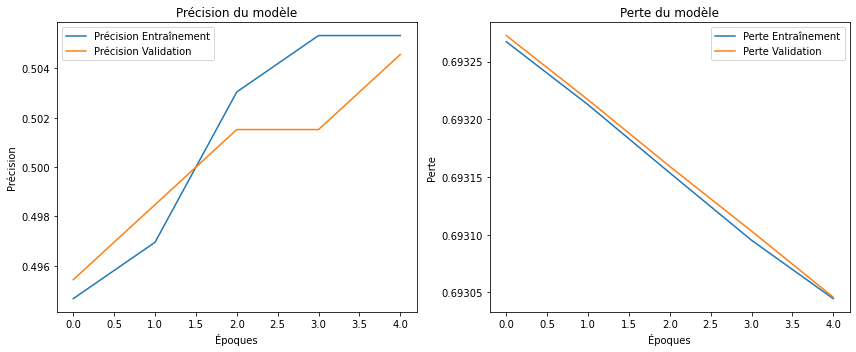

In [36]:
### Affichge 

set_seed(42)
train_and_plot_lr(model_VGG_1, X_train, y_train, X_val, y_val, 
                      batch_size=32, epochs=5, 
                      lr_factor=0.5, min_lr=1e-6, 
                      lr_patience=3, early_stop_patience=3)

#### Strategie 2


1. Nous allons commencer par garder toutes les couches denses, en utilisant les initialisations proposées par l'architecture de VGG16, tout en gelant les couches convolutives pour préserver les caractéristiques apprises sur ImageNet.

In [37]:
# Charger le modèle VGG16 avec les poids pré-entraînés
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers

# 1. Charger le modèle VGG16 pré-entraîné sur ImageNet, sans les couches fully connected
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Geler toutes les couches convolutives pour éviter qu'elles soient entraînées
# Cela permet de conserver les caractéristiques apprises lors de l'entraînement sur ImageNet
for layer in vgg_model.layers:
    layer.trainable = False

# 3. Définir l'entrée du modèle
input_layer = layers.Input(shape=(224, 224, 3))

# 4. Ajouter VGG16 au modèle sans les couches de sortie
x = vgg_model(input_layer)

# 5. Aplatir les sorties de VGG16 pour passer aux couches denses
x = layers.Flatten()(x)

# 6. Ajouter deux couches denses avec 4096 neurones et activation ReLU
# Ces couches vont permettre d'apprendre des caractéristiques spécifiques aux données d'entraînement
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)

# 7. Remplacer la dernière couche par une nouvelle couche de sortie (binaire, chiens vs chats)
# Cette couche aura un neurone avec une activation sigmoïde pour la classification binaire
output_layer = layers.Dense(1, activation='sigmoid')(x)

# 8. Créer le modèle final avec les couches définies
model_VGG16_2_basic = models.Model(inputs=input_layer, outputs=output_layer, name='model_VGG16_2_basic')

# 9. Compiler le modèle avec l'optimiseur Adam et la fonction de perte binaire
# Nous utilisons 'binary_crossentropy' car c'est une tâche de classification binaire
model_VGG16_2_basic .compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 10. Afficher le résumé du modèle pour vérifier l'architecture
model_VGG16_2_basic .summary()


58889256/58889256 [==============================] - 2s 0us/step
Model: "model_VGG16_2_basic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 4096)              102764544 
                                                                 
 dense_11 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_12 (Dense)            (None, 1)                 4097      
                                                

Epoch 1/10
42/42 [==============================] - 126s 3s/step - loss: 0.8110 - accuracy: 0.6895 - val_loss: 0.4245 - val_accuracy: 0.7903
Epoch 2/10
42/42 [==============================] - 122s 3s/step - loss: 0.2144 - accuracy: 0.9018 - val_loss: 0.2146 - val_accuracy: 0.9058
Epoch 3/10
42/42 [==============================] - 129s 3s/step - loss: 0.0750 - accuracy: 0.9741 - val_loss: 0.2105 - val_accuracy: 0.9271
Epoch 4/10
42/42 [==============================] - 126s 3s/step - loss: 0.0219 - accuracy: 0.9954 - val_loss: 0.2334 - val_accuracy: 0.9271
Epoch 5/10
42/42 [==============================] - 122s 3s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2533 - val_accuracy: 0.9240
Epoch 6/10
42/42 [==============================] - 121s 3s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2494 - val_accuracy: 0.9240
Epoch 7/10
42/42 [==============================] - 121s 3s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2621 - val_accuracy: 0.9301
Epoch 7: earl

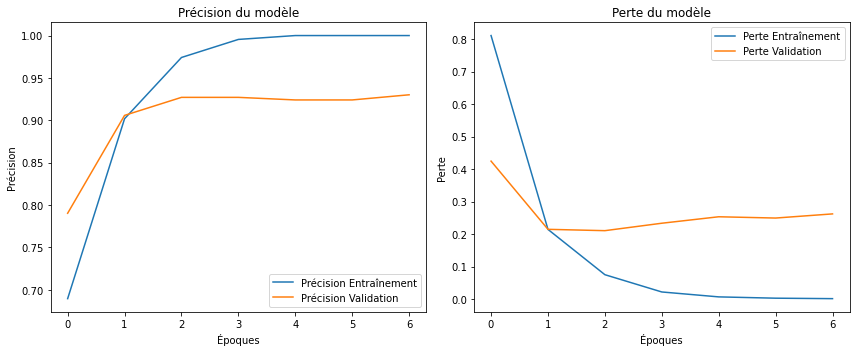

In [38]:
### Affichge 

set_seed(42) 
train_and_plot_basic(model_VGG16_2_basic , X_train, y_train, X_val, y_val, patience=4, epochs=10, batch_size=32)

##### Amelioration de la stratégie 2

2. Nous allons tâtonner avec les couches denses et leurs initialisations

In [39]:
# Charger le modèle VGG16 avec les poids pré-entraînés
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.layers import Dropout  


# 1. Charger le modèle VGG16 pré-entraîné sur ImageNet, sans les couches fully connected
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Geler toutes les couches convolutives pour éviter qu'elles soient entraînées
# Cela permet de conserver les caractéristiques apprises lors de l'entraînement sur ImageNet
for layer in vgg_model.layers:
    layer.trainable = False

# 3. Définir l'entrée du modèle
input_layer = layers.Input(shape=(224, 224, 3))

# 4. Ajouter VGG16 au modèle sans les couches de sortie
x = vgg_model(input_layer)

# 5. Aplatir les sorties de VGG16 pour passer aux couches denses
x = layers.Flatten()(x)

# 6. Ajouter deux couches denses avec 4096 neurones et activation ReLU
# Ces couches vont permettre d'apprendre des caractéristiques spécifiques aux données d'entraînement
x = layers.Dense(700, activation='relu')(x)
x = Dropout(0.5)(x)
#x = layers.Dense(1000, activation='relu')(x)
#x = Dropout(0.5)(x)

# 7. Remplacer la dernière couche par une nouvelle couche de sortie (binaire, chiens vs chats)
# Cette couche aura un neurone avec une activation sigmoïde pour la classification binaire
output_layer = layers.Dense(1, activation='sigmoid')(x)

# 8. Créer le modèle final avec les couches définies
model = models.Model(inputs=input_layer, outputs=output_layer, name='VGG16_strategie_2')

# 9. Compiler le modèle avec l'optimiseur Adam et la fonction de perte binaire
# Nous utilisons 'binary_crossentropy' car c'est une tâche de classification binaire
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 10. Afficher le résumé du modèle pour vérifier l'architecture
model.summary()


Model: "VGG16_strategie_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_13 (Dense)            (None, 700)               17562300  
                                                                 
 dropout_6 (Dropout)         (None, 700)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 701       
                                                                 
Total params: 32,277,689
Trainable params: 17,563

Epoch 1/10
42/42 [==============================] - 108s 3s/step - loss: 0.6673 - accuracy: 0.6081 - val_loss: 0.4643 - val_accuracy: 0.8207 - lr: 1.0000e-05
Epoch 2/10
42/42 [==============================] - 104s 2s/step - loss: 0.4512 - accuracy: 0.7930 - val_loss: 0.3573 - val_accuracy: 0.8663 - lr: 1.0000e-05
Epoch 3/10
42/42 [==============================] - 104s 2s/step - loss: 0.3240 - accuracy: 0.8760 - val_loss: 0.3126 - val_accuracy: 0.8845 - lr: 1.0000e-05
Epoch 4/10
42/42 [==============================] - 104s 2s/step - loss: 0.2837 - accuracy: 0.8896 - val_loss: 0.2822 - val_accuracy: 0.8967 - lr: 1.0000e-05
Epoch 5/10
42/42 [==============================] - 99s 2s/step - loss: 0.2574 - accuracy: 0.9102 - val_loss: 0.2677 - val_accuracy: 0.8997 - lr: 1.0000e-05
Epoch 6/10
42/42 [==============================] - 105s 3s/step - loss: 0.2108 - accuracy: 0.9338 - val_loss: 0.2486 - val_accuracy: 0.9179 - lr: 1.0000e-05
Epoch 7/10
42/42 [==============================] - 1

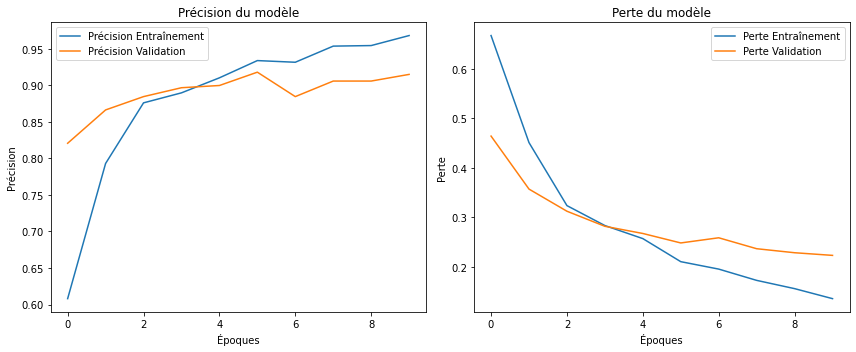

In [40]:
### Affichge 

set_seed(42)
train_and_plot_lr(model, X_train, y_train, X_val, y_val, 
                         batch_size=32, epochs=10, 
                         lr_factor=0.5, min_lr=1e-5, 
                         lr_patience=3, early_stop_patience=3, 
                         )

#### Amelioration ++

Epoch 1/10
42/42 [==============================] - 109s 3s/step - loss: 0.6304 - accuracy: 0.6613 - val_loss: 0.4125 - val_accuracy: 0.8602
Epoch 2/10
42/42 [==============================] - 107s 3s/step - loss: 0.4170 - accuracy: 0.8166 - val_loss: 0.3317 - val_accuracy: 0.8663
Epoch 3/10
42/42 [==============================] - 107s 3s/step - loss: 0.3266 - accuracy: 0.8653 - val_loss: 0.2976 - val_accuracy: 0.8906
Epoch 4/10
42/42 [==============================] - 108s 3s/step - loss: 0.2848 - accuracy: 0.8858 - val_loss: 0.2704 - val_accuracy: 0.8997
Epoch 5/10
42/42 [==============================] - 107s 3s/step - loss: 0.2482 - accuracy: 0.9110 - val_loss: 0.2525 - val_accuracy: 0.9027
Epoch 6/10
42/42 [==============================] - 106s 3s/step - loss: 0.2110 - accuracy: 0.9224 - val_loss: 0.2424 - val_accuracy: 0.9119
Epoch 7/10
42/42 [==============================] - 106s 3s/step - loss: 0.1844 - accuracy: 0.9384 - val_loss: 0.2494 - val_accuracy: 0.8906
Epoch 8/10
42

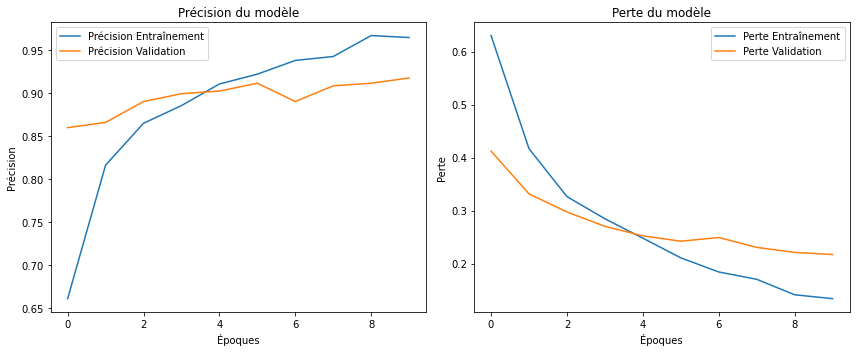

In [41]:
# Charger le modèle VGG16 avec les poids pré-entraînés
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers, regularizers
from tensorflow.keras.layers import Dropout  


# 1. Charger le modèle VGG16 pré-entraîné sur ImageNet, sans les couches fully connected
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Geler toutes les couches convolutives pour éviter qu'elles soient entraînées
# Cela permet de conserver les caractéristiques apprises lors de l'entraînement sur ImageNet
for layer in vgg_model.layers:
    layer.trainable = False

# 3. Définir l'entrée du modèle
input_layer = layers.Input(shape=(224, 224, 3))

# 4. Ajouter VGG16 au modèle sans les couches de sortie
x = vgg_model(input_layer)

# 5. Aplatir les sorties de VGG16 pour passer aux couches denses
x = layers.Flatten()(x)

# 6. Ajouter deux couches denses avec 4096 neurones et activation ReLU
# Ces couches vont permettre d'apprendre des caractéristiques spécifiques aux données d'entraînement
x = layers.Dense(1000, activation='relu')(x)
x = Dropout(0.592)(x)


output_layer = layers.Dense(1, activation='sigmoid')(x)

model_final = models.Model(inputs=input_layer, outputs=output_layer, name='model_final')


model_final.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])


set_seed(42)
train_and_plot_basic(model_final, X_train, y_train, X_val, y_val, patience=3, epochs=10, batch_size=32)

## 4. Performance du Modèle_finale VGG16 sur l’Ensemble de Test

13/13 [==============================] - 26s 2s/step


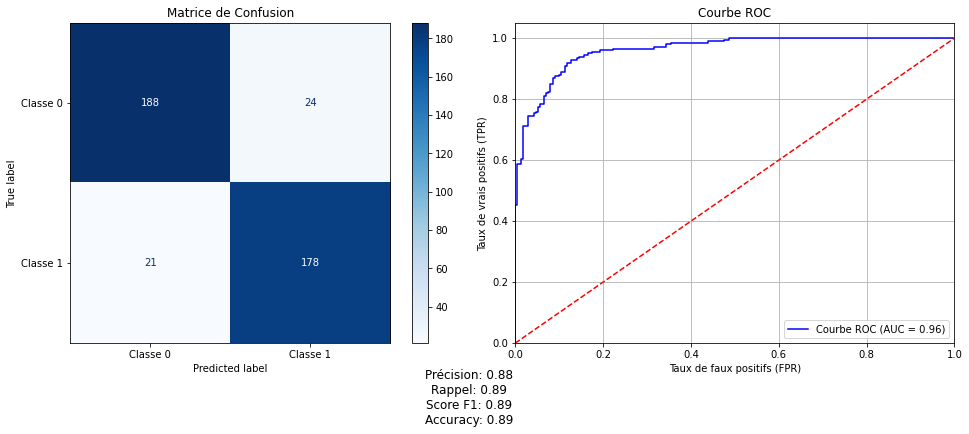

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, accuracy_score

# Prédire sur l'ensemble de test
y_pred_prob = model_final.predict(X_test).flatten()  # Obtenir les probabilités prédites pour la classe positive
y_pred = (y_pred_prob > 0.5).astype(int).flatten()   # Convertir les probabilités en classes binaires en utilisant un seuil de 0.5

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)  # Générer la matrice de confusion

# Calculer les métriques de performance
report = classification_report(y_test, y_pred, output_dict=True)  # Obtenir un rapport de classification
precision = report['1']['precision']  # Extraire la précision pour la classe positive
recall = report['1']['recall']        # Extraire le rappel pour la classe positive
f1_score = report['1']['f1-score']   # Extraire le score F1 pour la classe positive
accuracy = accuracy_score(y_test, y_pred)  # Calculer l'accuracy

# Calculer les valeurs pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Obtenir le taux de faux positifs et le taux de vrais positifs
roc_auc = auc(fpr, tpr)  # Calculer l'AUC (aire sous la courbe ROC)

# Créer une figure avec deux sous-graphes côte à côte
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Créer une figure avec une ligne et deux colonnes

# Matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Classe 0', 'Classe 1'])  # Créer un objet pour afficher la matrice de confusion
disp.plot(ax=ax[0], cmap=plt.cm.Blues)  # Tracer la matrice de confusion sur le premier sous-graphe
ax[0].set_title('Matrice de Confusion')  # Titre du sous-graphe de la matrice de confusion

# Courbe ROC
ax[1].plot(fpr, tpr, color='blue', label='Courbe ROC (AUC = {:.2f})'.format(roc_auc))  # Tracer la courbe ROC
ax[1].plot([0, 1], [0, 1], color='red', linestyle='--')  # Tracer la diagonale de chance (modèle aléatoire)
ax[1].set_xlim([0.0, 1.0])  # Définir les limites de l'axe des X
ax[1].set_ylim([0.0, 1.05])  # Définir les limites de l'axe des Y
ax[1].set_xlabel('Taux de faux positifs (FPR)')  # Étiquette de l'axe des X
ax[1].set_ylabel('Taux de vrais positifs (TPR)')  # Étiquette de l'axe des Y
ax[1].set_title('Courbe ROC')  # Titre du sous-graphe de la courbe ROC
ax[1].legend(loc='lower right')  # Légende en bas à droite
ax[1].grid()  # Activer la grille sur le sous-graphe de la courbe ROC

# Créer une zone pour afficher les métriques en dessous des graphiques
metrics_text = (f'Précision: {precision:.2f}\n'  # Créer un texte pour afficher les métriques
                f'Rappel: {recall:.2f}\n'
                f'Score F1: {f1_score:.2f}\n'
                f'Accuracy: {accuracy:.2f}')  # Ajouter l'accuracy

# Afficher les métriques en dessous des graphiques
plt.figtext(0.5, 0.01, metrics_text, ha='center', fontsize=12)  # Ajouter le texte au bas de la figure

# Afficher la figure
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Ajuster l'espacement des sous-graphes pour faire de la place pour le texte
plt.show()  # Afficher la figure
